<a href="https://www.kaggle.com/code/nitinsoni1/nlp-project?scriptVersionId=92232249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-reviews-dataset/yelp.csv


# Natural Language Processing Project
****Attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.
 Each observation in this dataset is a review of a particular business by a particular user.
 The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
The "cool" column is the number of "cool" votes this review received from other Yelp users.
All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
The "useful" and "funny" columns are similar to the "cool" column.****

**Imports****

In [2]:
import numpy as np
import pandas as pd

**The Data¶**

In [3]:
yelp = pd.read_csv('../input/yelp-reviews-dataset/yelp.csv')

**** Checking the head, info , and describe methods on yelp.****

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


**Createing a new column called "text length" which is the number of words in the text column.**

In [7]:
yelp['text length'] = yelp['text'].apply(len)

# **EDA**
**Let's explore the data**

**Imports**
**Import the data visualization libraries.**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

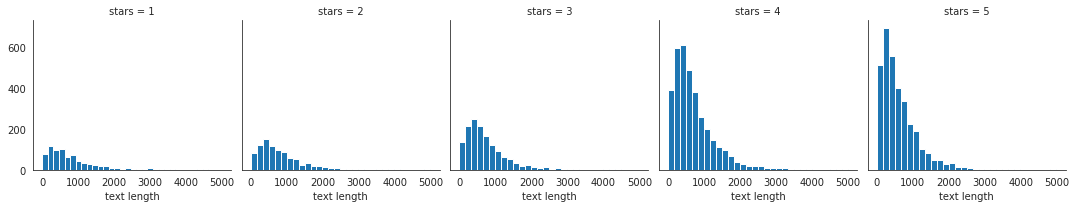

In [9]:
g= sns.FacetGrid(yelp,col ='stars')
g.map(plt.hist,'text length',bins = 30)

**Let's create a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

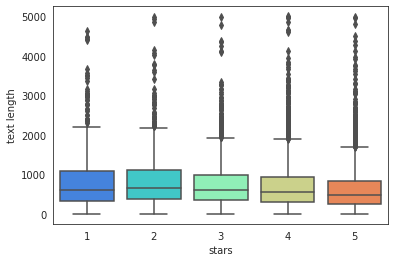

In [10]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

**Let's create a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

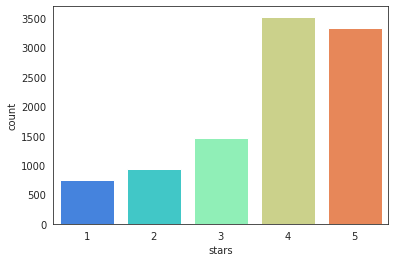

In [11]:
sns.countplot(x='stars',data= yelp, palette='rainbow')

**Using groupby to get the mean values of the numerical columns.**

In [12]:
stars=yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Using the corr() method on that groupby dataframe to produce this dataframe:**

In [13]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Now using the seaborn to create a heatmap based off our .corr() dataframe:**

<AxesSubplot:>

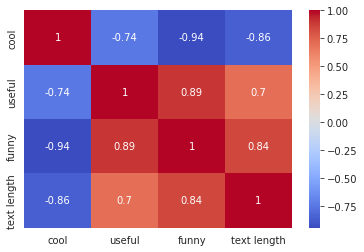

In [14]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

# **NLP Classification Task**
**Let's move on to the actual task. To make things a little easier, we will only grab reviews that were either 1 star or 5 stars.Let's create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [15]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]


**let us create two objects x and y. x will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [16]:
x=yelp_class['text']
y=yelp_class['stars']

**Now Import CountVectorizer and create a CountVectorizer object and make an instance cv().**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Now using the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting x.**

In [18]:
x = cv.fit_transform(x)

# Train Test Split
**Let's split our data into training and testing data.
Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=101)

# Training a Model
**Time to train a model! Import MultinomialNB and create an instance of the estimator and call is nb** 

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [22]:
nb.fit(x_train,y_train)

MultinomialNB()

# Predictions and Evaluations
**Time to see how our model did! Use the predict method off of nb to predict labels from x_test.**

In [23]:
predictions = nb.predict(x_test)

**Createing a confusion matrix and classification report using these predictions and y_test**

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Great Work
**we have made a nice model with good precision for 1 and 5 stars
and 93 % accuracy**
